In [11]:
import numpy as np
import pandas as pd
from DALNModel import Model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer
from sklearn.metrics import accuracy_score
import cv2
from DALNtrain import train
from DisplayLogs import display_logs
from PlotatIntervals import plot_tsne_at_intervals


In [2]:

#define a function to standardize the image and resize it
def ppandresize(X, n_h, n_w):
    """
    :param X: image array of size nxhxwxc
    :param n_h: the required new height
    :param n_w: the required new width
    :return: image array of size nxn_h,n_wxc
    """
    new_size=(n_h,n_w)
    if X.dtype is np.uint8:
        X=X/255
    if X.dtype is np.float64:
        print('it is float 64')
        X=(X + 1) / 2.0  # Convert to the range [0, 1]
        # Optionally, ensure the values are clipped to [0, 1]
        X = np.clip(X, 0, 1)
    
    X_resized=np.zeros((X.shape[0], *new_size))
    for i in range(X.shape[0]):
        X_resized[i]=cv2.resize(X[i], new_size)
    return X_resized

#define a function to convert grayscale image to image with 3 channels
def graytoRGB(X):
    """
    :param X: grayscale image of size nxhxwx1
    :return: grayscale image of size nxhxwx3
    """
    X=np.stack((X,)*3, axis=-1)
    return X

In [3]:
# import mnist dataset and preprocess it as source data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, y_train= X_train[0:5000], y_train[0:5000]
X_test, y_test= X_test[0:500], y_test[0:500]
X_train, X_test= X_train/255, X_test/255
X_train=ppandresize(X_train,32,32) 
X_train=graytoRGB(X_train) 

X_test=ppandresize(X_test,32,32)
X_test=graytoRGB(X_test)

In [4]:
#import usps data as target data
from extra_keras_datasets import usps
(X_t, y_t), (_, _)=usps.load_data()
X_t, y_t= X_t[0:5000], y_t[0:5000]
X_t=ppandresize(X_t,32,32)
X_t=graytoRGB(X_t)
X_t=(X_t+1)/2

INFO:root:Loading dataset = usps


In [12]:
modelDA=Model()


In [13]:
modelDA.feature_extractor.load_weights('customDALN_fe_weights.h5')
modelDA.label_predictor.load_weights('customDALN_lp_weights.h5')

Epoch 1 Loss: 0.15973228216171265
The accuracy of model after applying DALN is:
{'accuracy_score_source': 0.9646, 'accuracy_score_target': 0.6354}
The TSNE projection after applying DALN is:


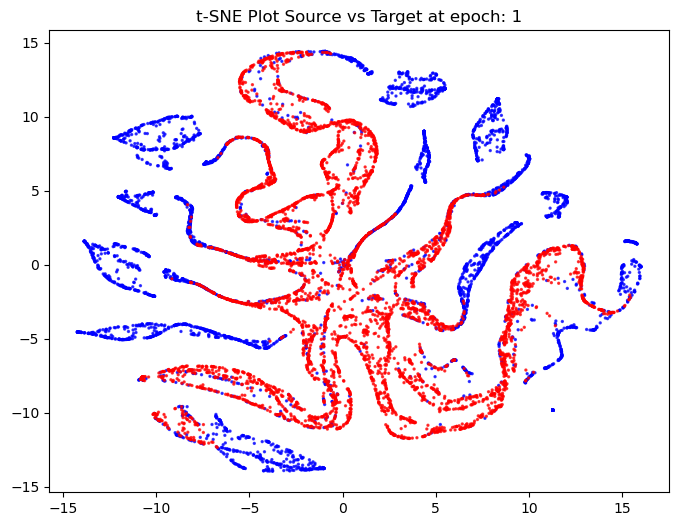

In [14]:
logs_DA=display_logs(X_source=X_train, y_source= y_train, model=modelDA, batch_size=32, X_target=X_t, y_target= y_t, epochs=1, source_only=False)
accuracy_log_DA=logs_DA.accuracy()
print('The accuracy of model after applying DALN is:')
print(accuracy_log_DA)
print('The TSNE projection after applying DALN is:')
logs_DA.plot_tsne()

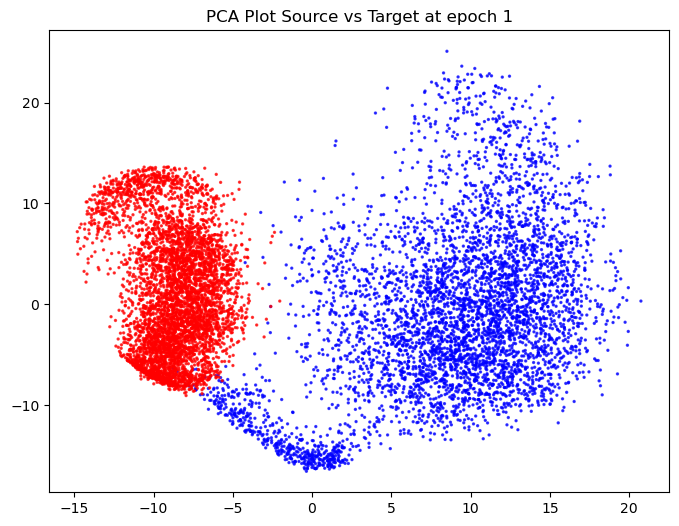

In [16]:
logs_DA.plot_pca()

In [7]:
modelDA.feature_extractor.save_weights('customDALN_fe_weights.h5')
modelDA.label_predictor.save_weights('customDALN_lp_weights.h5')

In [7]:
modelnotDA=Model()

Epoch 1 Loss: 0.515863299369812
Epoch 2 Loss: 0.19304725527763367
Epoch 3 Loss: 0.06764329224824905
Epoch 4 Loss: 0.02358061820268631
Epoch 5 Loss: 0.009042900055646896
Epoch 6 Loss: 0.0036937990225851536
Epoch 7 Loss: 0.0022029310930520296
Epoch 8 Loss: 0.0016369656659662724
Epoch 9 Loss: 0.001363922841846943
Epoch 10 Loss: 0.0011818313505500555
Epoch 11 Loss: 0.0010489885462448
Epoch 12 Loss: 0.0009478876017965376
Epoch 13 Loss: 0.0008689129608683288
Epoch 14 Loss: 0.0008048423333093524
Epoch 15 Loss: 0.0007521558436565101
Epoch 16 Loss: 0.0007074510212987661
Epoch 17 Loss: 0.0006693288451060653
Epoch 18 Loss: 0.0006361691048368812
Epoch 19 Loss: 0.0006071607349440455
Epoch 20 Loss: 0.0005816741613671184
Epoch 21 Loss: 0.0005589546635746956
Epoch 22 Loss: 0.0005386491538956761
Epoch 23 Loss: 0.0005204584449529648
Epoch 24 Loss: 0.0005039728130213916
Epoch 25 Loss: 0.0004888665280304849
Epoch 26 Loss: 0.00047501170774921775
Epoch 27 Loss: 0.0004623182467184961
Epoch 28 Loss: 0.0004505

Epoch 217 Loss: 0.0001648199395276606
Epoch 218 Loss: 0.0001645549782551825
Epoch 219 Loss: 0.0001642909919610247
Epoch 220 Loss: 0.00016403081826865673
Epoch 221 Loss: 0.00016377068823203444
Epoch 222 Loss: 0.00016351423982996494
Epoch 223 Loss: 0.0001632572675589472
Epoch 224 Loss: 0.0001630048791412264
Epoch 225 Loss: 0.0001627529418328777
Epoch 226 Loss: 0.00016250372573267668
Epoch 227 Loss: 0.00016225653234869242
Epoch 228 Loss: 0.00016200842219404876
Epoch 229 Loss: 0.0001617650268599391
Epoch 230 Loss: 0.00016152215539477766
Epoch 231 Loss: 0.00016128114657476544
Epoch 232 Loss: 0.0001610417675692588
Epoch 233 Loss: 0.00016080393106676638
Epoch 234 Loss: 0.0001605689467396587
Epoch 235 Loss: 0.00016033422434702516
Epoch 236 Loss: 0.00016010139370337129
Epoch 237 Loss: 0.00015986993093974888
Epoch 238 Loss: 0.0001596400106791407
Epoch 239 Loss: 0.00015941148740239441
Epoch 240 Loss: 0.00015918497228994966
Epoch 241 Loss: 0.00015896096010692418
Epoch 242 Loss: 0.00015873735537752

Epoch 429 Loss: 0.00013249024050310254
Epoch 430 Loss: 0.00013239949475973845
Epoch 431 Loss: 0.00013231011689640582
Epoch 432 Loss: 0.00013222015695646405
Epoch 433 Loss: 0.00013212973135523498
Epoch 434 Loss: 0.00013203972775954753
Epoch 435 Loss: 0.0001319509610766545
Epoch 436 Loss: 0.00013186172873247415
Epoch 437 Loss: 0.0001317744900006801
Epoch 438 Loss: 0.0001316851266892627
Epoch 439 Loss: 0.0001315975096076727
Epoch 440 Loss: 0.0001315102563239634
Epoch 441 Loss: 0.0001314215041929856
Epoch 442 Loss: 0.00013133636093698442
Epoch 443 Loss: 0.0001312497624894604
Epoch 444 Loss: 0.00013116380432620645
Epoch 445 Loss: 0.00013107762788422406
Epoch 446 Loss: 0.0001309918297920376
Epoch 447 Loss: 0.0001309068175032735
Epoch 448 Loss: 0.0001308213104493916
Epoch 449 Loss: 0.00013073622540105134
Epoch 450 Loss: 0.00013065055827610195
Epoch 451 Loss: 0.00013056566240265965
Epoch 452 Loss: 0.00013048214896116406
Epoch 453 Loss: 0.00013039652549196035
Epoch 454 Loss: 0.00013031272101216

Epoch 641 Loss: 0.00011835339682875201
Epoch 642 Loss: 0.0001183030180982314
Epoch 643 Loss: 0.00011825451656477526
Epoch 644 Loss: 0.00011820757936220616
Epoch 645 Loss: 0.00011815729521913454
Epoch 646 Loss: 0.00011810801515821368
Epoch 647 Loss: 0.00011805926624219865
Epoch 648 Loss: 0.0001180100443889387
Epoch 649 Loss: 0.00011796224134741351
Epoch 650 Loss: 0.00011791339056799188
Epoch 651 Loss: 0.00011786396498791873
Epoch 652 Loss: 0.0001178173697553575
Epoch 653 Loss: 0.00011776865721913055
Epoch 654 Loss: 0.00011772158177336678
Epoch 655 Loss: 0.00011767463729484007
Epoch 656 Loss: 0.00011762540088966489
Epoch 657 Loss: 0.00011757823085645214
Epoch 658 Loss: 0.00011753124999813735
Epoch 659 Loss: 0.00011748321412596852
Epoch 660 Loss: 0.00011743674986064434
Epoch 661 Loss: 0.00011739109322661534
Epoch 662 Loss: 0.00011734315194189548
Epoch 663 Loss: 0.00011729708057828248
Epoch 664 Loss: 0.00011725084914360195
Epoch 665 Loss: 0.00011720386100932956
Epoch 666 Loss: 0.0001171577

Epoch 852 Loss: 0.00011008836736436933
Epoch 853 Loss: 0.00011005797568941489
Epoch 854 Loss: 0.0001100258159567602
Epoch 855 Loss: 0.00010999495134456083
Epoch 856 Loss: 0.00010996290075127035
Epoch 857 Loss: 0.00010993226896971464
Epoch 858 Loss: 0.00010990134614985436
Epoch 859 Loss: 0.00010987134010065347
Epoch 860 Loss: 0.00010983966785715893
Epoch 861 Loss: 0.00010980970546370372
Epoch 862 Loss: 0.000109779168269597
Epoch 863 Loss: 0.0001097492131520994
Epoch 864 Loss: 0.0001097185886465013
Epoch 865 Loss: 0.00010968829155899584
Epoch 866 Loss: 0.00010965684487018734
Epoch 867 Loss: 0.00010962679516524076
Epoch 868 Loss: 0.00010959641076624393
Epoch 869 Loss: 0.00010956477490253747
Epoch 870 Loss: 0.00010953462333418429
Epoch 871 Loss: 0.00010950490104733035
Epoch 872 Loss: 0.00010947508417302743
Epoch 873 Loss: 0.00010944522364297882
Epoch 874 Loss: 0.00010941569053102285
Epoch 875 Loss: 0.00010938463674392551
Epoch 876 Loss: 0.00010935639147646725
Epoch 877 Loss: 0.000109326050

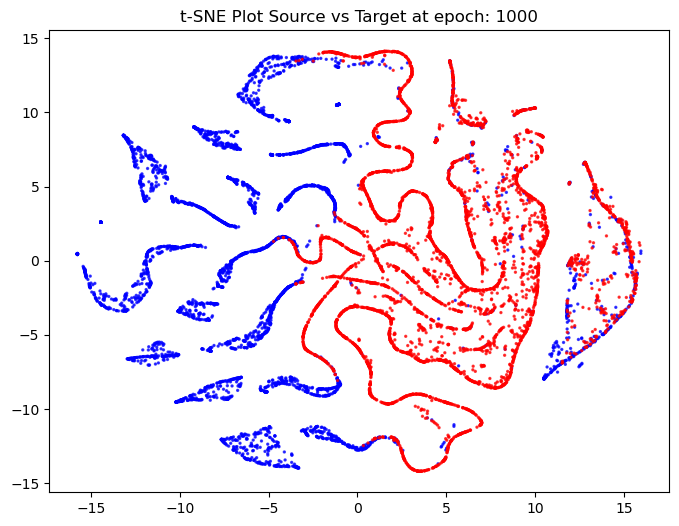

In [8]:
logs_notDA= display_logs(X_source=X_train, y_source= y_train, model=modelnotDA, X_target= X_t, y_target= y_t, batch_size=32, epochs=1000, source_only=True)
accuracy_log_notDA=logs_notDA.accuracy()
print('The accuracy of model with source only is:')
print(accuracy_log_notDA)
print('The TSNE projection of the two domains is:')
logs_notDA.plot_tsne()